# Reduction de la dimension d'un ensembre de données par l'Analyse en Composante Principales


“L'idée générale derrière l'ACP est la décorrélation des variables. En effet l'ACP transforme les variables d'un jeu de données en un nouvel ensemble de variables appelées composantes principales. Chacune de ces composants représente (explique) un certain pourcentage de la variabilité totale des données le long d'un axe orthogonal les uns aux autres. Le premier axe (donc la première composante principale) est la direction dans laquelle les données varient le plus.”


## Iniiation à l'Analyse en Composante Principale

### Introduction

Les ensembles de données à grande dimension posent de nombre défis dont :
- Le problèmen de stockage et des ressources de calcul très coûteux en terme d'analyse
- Le problème de surapprentissage(overfitting) dans des tâches de modélisation
- Le fait que certains algorithmes, très utilisés en ML ne peuvent pas traiter ce genre de données 
- Correlation entre différentes variables : problème de multi-colinéarité
- Etc

Pour résoudre ce problème de grande dimention, on fait appelle aux **Techniques de réduction de dimensionnalité** dont l'ACP est la plus polulaire.

### Mise en Place de l'Enviroment de Travail

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Librairies

In [ ]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Excerice d'inition à l'ACP

On dispose d'un jeu de données de mesures (largeur et longueur) sur les grains de mais.

In [ ]:
# Importation des données

grains_df = pd.read_csv("https://raw.githubusercontent.com/JosueAfouda/PCA-Lesson/master/seeds-width-vs-length.csv", 
                          header=None, names=['largeur', 'longueur'])

In [ ]:
grains_df.head()

,largeur,longueur
0,3.312,5.763
1,3.333,5.554
2,3.337,5.291
3,3.379,5.324
4,3.562,5.658


In [ ]:
grains_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   largeur   210 non-null    float64
 1   longueur  210 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


#### Calculer le coefficiant de correlation de pearson

In [ ]:
# Création d'un tableau numpy 2D à partir de grains_df

grains_array = grains_df.values
l = grains_array[:, 0]
L = grains_array[:, 1]

# Coefficiant de corrélation entre la largeur et la Longueur des grains
coef_cor, pvalue = pearsonr(l, L)
print(coef_cor, pvalue)

0.8604149377143469 8.121332906192771e-63


On observe qu'il existe une forte correlation positive (coef_cor = 0.86) et statistiquement significative (p < 0.05) entre la largeur er la longueur des grains.

Il faut donc que nous arrivions à décoreller ses variables. Et pour cela nous allons appliqeuer la technique de l'ACP qui a un double avantage dans ce cas, d'abord elle pas nous permettre de  décorreler nos variables (donc on aura plus de probème de multicolinéarité) et elle va nous nous permettre de réduire la dimension de notre jeu de données).  Pour ce faire, nous allons d'abord visualiser nos variables sur un nuage de points pour confimer leur correlation.

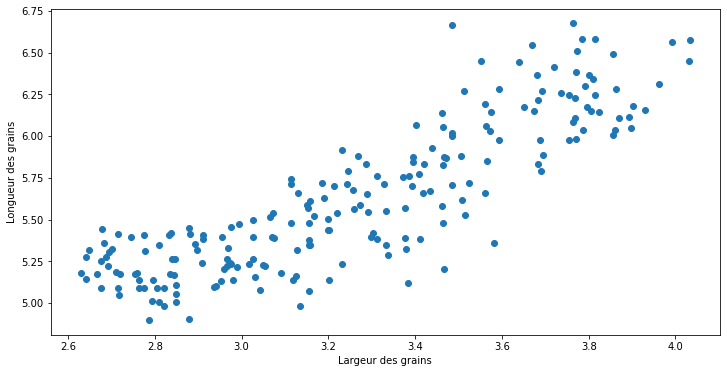

In [ ]:
# Visualisation du nuage de points
plt.figure(figsize=(12, 6))

plt.scatter(l, L)
plt.xlabel('Largeur des grains')
plt.ylabel('Longueur des grains');

#### Appliquons l'ACP à nos variables
- Par défaut, le nombre de composants **`n_components`** que prend la fonction PCA c'est le nombre de variables originelles de jeu de données
- La méthode **`fit_transformer`** nous permet d'entrainer le modèle via l'objet PCA avec les données instancier puis nous transformons en meme tant ces données entrainer

In [ ]:
# Création d'une instance de la classe PCA
model_pca = PCA()

# Application du modèle aux données (Entraînement du modèle par les données et transformation des données)
grains_pca =  model_pca.fit_transform(grains_array)
grains_pca[:10]

array([[ 0.13754637,  0.04487015],
       [-0.00977932, -0.10485339],
       [-0.20950238, -0.27601326],
       [-0.15727909, -0.28722613],
       [ 0.21656348, -0.21451623],
       [-0.15241316, -0.19607065],
       [-0.05015063, -0.04218636],
       [-0.13265396, -0.16665   ],
       [ 0.45837451,  0.11253335],
       [ 0.35395666, -0.02623954]])

L'arguement n_componenrs de la fonction PCA() est par défaut égal qu nombre de variables de l'ensemble des donnée. le résulat de l'application de l'ACP sur les données est tableau numpy 2D composée de 02 composantes principales. Visualisons ce résultat.

In [ ]:
# Première composante principale
comp1 = grains_pca[:, 0]

# Deuxième composante principale
comp2 = grains_pca[:, 1]

# Calcul du coefficient de correlation entre comp1 et comp2
coef_cor_comp, pvalue_comp = pearsonr(comp1, comp2)
print(coef_cor_comp, pvalue_comp)

8.933825901280557e-17 0.9999999999999515


Ce résulat nous permet de conclure qu'il y'a pas de correlation linéaire entre les deux composantes principales. L'ACP a transformé les variables correlées de notre jeu de données en un nouvel ensemble de variables non correlées. 

Visualisons nos composantes sur un nuage de points pour confimer leur non-correlation.

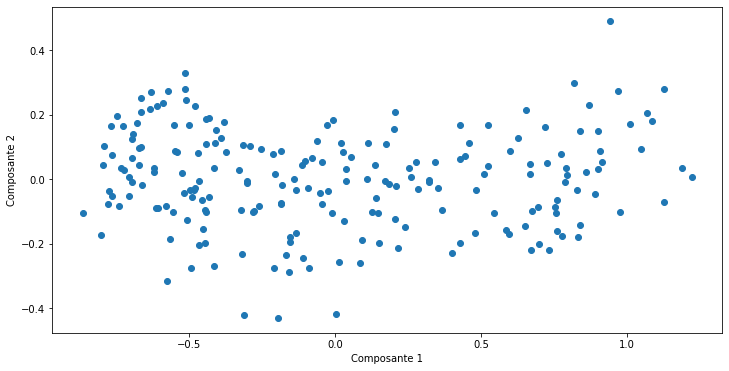

In [ ]:
# Nuage de points entre comp1 et comp2
plt.figure(figsize=(12, 6))
plt.scatter(comp1, comp2)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2');

#### Quelle est la variance expliquée par chacune des 02 composantes principales ?

Pour cela nous allons voir quelques atributs du résultat de notre modèle PCA pour analyser un peu ce résultat.

In [ ]:
# Attricbut du modèle PCA pour retrouver la quantité de variance expliquée par chaque composante
  ## Quel est la quantité de variance expliqué par chaque composante ?
  ## Chaque composante explique quel information ? quel quantité d'information de notre jeu de données ?

qte_varianceExplique_pca = model_pca.explained_variance_
print(f"La première composante explique : {qte_varianceExplique_pca[0].round(3)} \
     \nLa deuxième composante expliqe : {qte_varianceExplique_pca[1].round(3)}")

La première composante explique : 0.316      
La deuxième composante expliqe : 0.023


In [ ]:
# Attribut du modèle PCA pour retrouver le pourcentage de variance expliquée par chaque composante
  ## Quel est la variance expliqué en terme de pourcentage
pct_varianceExplique_pca = model_pca.explained_variance_ratio_

print(f"La première composante explique : {pct_varianceExplique_pca[0].round(4)*100} % de la variance total \
     \nLa deuxième composante expliqe : {pct_varianceExplique_pca[1].round(3)*100} % de la variance total")

La première composante explique : 93.21000000000001 % de la variance total      
La deuxième composante expliqe : 6.800000000000001 % de la variance total


On en conclut que la deuxième composante est plutôt annecdotique étant donnée quel n'explique pratiquement rien . Cela nous donne donc une idée de la dimension intrinsèque de notre jeu de donnée (c-a-d que nous pouvons réduire notre jeu de données en passant de 02 variables à une seule variable).

Quel est la variance cumululés expliqué par un n_composantes ? Ici la **`variance cumulé`**  nous permet de de  voir le pourcentatge de variance qu'on peu expliquer en utilisant un certains nombre de composantes.

In [ ]:
# Voir le pourcentatge de variance qu'on peu expliqyer en utilisant un certain nombre de composantes
model_pca.explained_variance_ratio_.cumsum()

array([0.93209254, 1.        ])

In [ ]:
# Attribut du modèle PCA pour retrouver le nombre de composanres principales
model_pca.n_components_

2

Visualisation des résultats (pourcentage de variance expliquée par chaque composante)

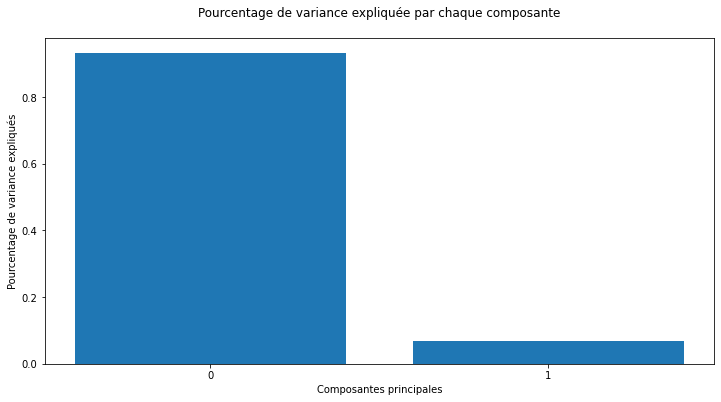

In [ ]:
# Visualisation du pourcentage de variance expliquée par chaque composante
plt.figure(figsize=(12, 6))
plt.bar(range(model_pca.n_components_), model_pca.explained_variance_ratio_)
plt.title("Pourcentage de variance expliquée par chaque composante\n")
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliqués')
plt.xticks(range(model_pca.n_components_));

Nous pouvons obverver de ce diagrame en bar que la première composante principale explique la majorité de l'information contenu (qui se retrouve) dans nos données et la deuxième composante est carrément annecdotique (elle ne sert pas à grand chose).

In [ ]:
# Attribut pour retrouver les composantes principaux au niveau de chaque axe
pca_components = model_pca.components_
pca_components

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

Le tableau numpy 2D résultat de l'attribut **`components_`** du moèle PCA nous indique dans quelle mesure le vecteur de chaque composante principale est affecté par chaque variable originelle.

In [ ]:
component1 = pca_components[0].round(4)
component2 = pca_components[1].round(4)

component1, component2

(array([0.6391, 0.7691]), array([-0.7691,  0.6391]))

On peut donc écrire chaque composante comme une combinaison linéaire de nos variables originelles, ce qui peut aider à l'interpretation des composantes principale.

Il faut noter que ce qui est difficile dans la technique d'ACP c'est l'interpretation après des composantes principales.

Mais si l'objectif de l'analyse c'est juste réduire la dimension de notre jeu de données, parfois l'interpretation importe peu.

In [ ]:
print(f"Composante principale 1 = {component1[0]}*largeur + {component1[1]}*longueur")
print(f"Composante principale 2 = {component2[0]}*largeur + {component2[1]}*longueur")

Composante principale 1 = 0.6391*largeur + 0.7691*longueur
Composante principale 2 = -0.7691*largeur + 0.6391*longueur


source : https://www.youtube.com/watch?v=s6J1LjpzGWk&list=PLmJWMf9F8euSqYZRPZDQXuYluBpIehqE7&index=2 

# ACP dans un Pipeline
Un pipeline est un objet python qui regroupe plusieurs étatpes.

Ici nous allons mettre toutes les étapes qui vont nous permettre d'implémenter la technique ACP dans une fonction pipeline. Nous n'aurons plus besoin de faire des calculs très longs ou étapes intermediaire.

In [ ]:
from sklearn.pipeline import Pipeline

### Dataset

L'ensemble des données de cette partie est un tableau. d'échantillons donnant des mesures (le poids en grammes, la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur, etc) de 7 espèces de poissons codées de 1 à 7. Chaque ligne représente un poisson individuel. Ces données proviennent de [Journal of Statistics Education](http://jse.amstat.org/datasets/). 


In [ ]:
def dataset_description():
  url = "http://jse.amstat.org/datasets/fishcatch.txt"
  des = """
NAME:  fishcatch
TYPE:  Sample 
SIZE:  159 observations, 8 variables

DESCRIPTIVE ABSTRACT:

159 fishes of 7 species are caught and measured. Altogether there are
8 variables.  All the fishes are caught from the same lake
(Laengelmavesi) near Tampere in Finland.

SOURCES:
Brofeldt, Pekka: Bidrag till kaennedom on fiskbestondet i vaera
        sjoear. Laengelmaevesi. T.H.Jaervi: Finlands Fiskeriet  Band 4,
        Meddelanden utgivna av fiskerifoereningen i Finland.
        Helsingfors 1917

VARIABLE DESCRIPTIONS:

1  Obs       Observation number ranges from 1 to 159
2  Species   (Numeric)
        Code Finnish  Swedish    English        Latin      
         1   Lahna    Braxen     Bream          Abramis brama
         2   Siika    Iiden      Whitewish      Leusiscus idus
         3   Saerki   Moerten    Roach          Leuciscus rutilus
         4   Parkki   Bjoerknan  ?              Abramis bjrkna
         5   Norssi   Norssen    Smelt          Osmerus eperlanus
         6   Hauki    Jaedda     Pike           Esox lucius
         7   Ahven    Abborre    Perch          Perca fluviatilis

3  Weight      Weight of the fish (in grams)
4  Length1     Length from the nose to the beginning of the tail (in cm)
5  Length2     Length from the nose to the notch of the tail (in cm)
6  Length3     Length from the nose to the end of the tail (in cm)
7  Height%     Maximal height as % of Length3
8  Width%      Maximal width as % of Length3
9  Sex         1 = male 0 = female
"""

  return print(des)

In [ ]:
dataset_description()


NAME:  fishcatch
TYPE:  Sample 
SIZE:  159 observations, 8 variables

DESCRIPTIVE ABSTRACT:

159 fishes of 7 species are caught and measured. Altogether there are
8 variables.  All the fishes are caught from the same lake
(Laengelmavesi) near Tampere in Finland.

SOURCES:
Brofeldt, Pekka: Bidrag till kaennedom on fiskbestondet i vaera
        sjoear. Laengelmaevesi. T.H.Jaervi: Finlands Fiskeriet  Band 4,
        Meddelanden utgivna av fiskerifoereningen i Finland.
        Helsingfors 1917

VARIABLE DESCRIPTIONS:

1  Obs       Observation number ranges from 1 to 159
2  Species   (Numeric)
        Code Finnish  Swedish    English        Latin      
         1   Lahna    Braxen     Bream          Abramis brama
         2   Siika    Iiden      Whitewish      Leusiscus idus
         3   Saerki   Moerten    Roach          Leuciscus rutilus
         4   Parkki   Bjoerknan  ?              Abramis bjrkna
         5   Norssi   Norssen    Smelt          Osmerus eperlanus
         6   Hauki    J

In [ ]:
# Importation du jeu de données
fishes_data_file = "http://jse.amstat.org/datasets/fishcatch.dat.txt"

columns = ["Species", "Weight", "Length1", "Length2", "Length3", "Height%", "Width%", "Sex"]

fishes = pd.read_csv(filepath_or_buffer=fishes_data_file, delimiter='\s+', header=None, names=columns)

fishes_df = fishes.copy()

In [ ]:
fishes_df.head()

,Species,Weight,Length1,Length2,Length3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [ ]:
fishes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


In [ ]:
# Suppression des colonnes 'Species' et 'Sex'
fishes_df.drop(columns=["Species", "Sex"], inplace=True)

In [ ]:
# Remplacement (imputatation) de la valeur manquante au niveau de la variable 'Weight' 
fishes_df["Weight"] = fishes_df["Weight"].fillna(fishes_df["Weight"].mean(axis=0))

# Vérifions qu'il n'y a plus de données manquantes
fishes_df.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height%    0
Width%     0
dtype: int64

L'ensemble des données ci-dessus est de 6 dimensions (6 variables). A l'aide de la technique de l'ACP Réduisez la dimension de cet ensemble afin de trouver sa dimension intrinsèque.

In [ ]:
# Création d'un tableauy numoys 2D à npartur de la daframe fishes
fishes_array = fishes.values

# Création d'un objet Pipeline qui va regrouper les étapes de standardisation et d'ACP
  ## C'est l'avantage d'un pipeline, ça regroupe les étaples
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA())])

# Application de l'objet de l'objet pipe aux données 
pipe.fit(fishes_array)

# Visualisation du pourcentage de variance expliquée par chaque composante 
plt.bar(range(pipe[1].n_components_), pipe[1].explained_variance_ratio_)
plt.xlabel("Composantes principales")
plt.ylabel("Pourcentage de variance expliquées")
plt.xticks(range(pipe[1].n_components_)). # graduation de 0 jusqu'au nbre total de composantes

SyntaxError: ignored